# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q2, and one of Q1 or Q3.

In [1]:
! git clone https://github.com/ds4e/wrangling

Cloning into 'wrangling'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 63 (delta 8), reused 5 (delta 5), pack-reused 45 (from 1)
Receiving objects: 100% (63/63), 13.84 MiB | 8.59 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [ ]:
#choosing Q2 and Q3

In [2]:
#importing modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
#importing dataframe
#first downloaded dataset, then uploaded it to the github data file to import, was having issues adding the file directly from the local file path of my computer
sharks = pd.read_excel("/content/wrangling/data/GSAF5.xls")

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [13]:
sharks.shape
#23 columns

(6990, 23)

In [11]:
sharks.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [ ]:
#dropping pdf, href formula, href, Case Number, Case Number.1 cols[15-19], cannot see all 23 columns at once

In [ ]:
#drop column by index , inplace argument modifies the original, inplace = F: makes a copy of the df, axis = 1 indicates columns, axis =2 indicates rows
#df.drop(df.columns[1], axis =1, inplace = True) or drop by name df.drop(columns = ['col', 'col2'])

In [19]:
#sharks.drop[sharks.columns[15:23], axis=1, inplace = True]

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<ipython-input-19-3b00f484ec41>, line 1)

In [167]:
#question 2.2
sharks = sharks.drop(columns=['pdf', 'href', 'href formula', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22']) #all had NA values

In [168]:
# 2.3 Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940.
# Are attacks increasing, decreasing, or remaining constant over time?

#drop .0 at the end -- turn from double to integer
#use .astype(int) if no n/a values
#sharks['Year']= pd.to_numeric(sharks['Year'], downcast = 'integer') did not work?
#errors = 'coerce' preserves n/a values
sharks['Year'] = pd.to_numeric(sharks['Year'], errors= 'coerce').astype('Int64')

#.drop used for dropping rows and columns, need x for modifying values inside of a column
#drop .0 at the end of each year
#replace() method refers to text/string data not numeric

#sharks['Year'].describe()
#verifying
sharks['Year'].value_counts()
#vaule_counts() counts unique occurances in table format

#drop max (2026) do not make sense
# use ~ (boolean not operator)
#dropping 2026 values b/c is not a possible data point
sharks = sharks[~sharks['Year'].isin([2026.0])]


#describe range of values
sharks['Year'].describe()
#There are more reports since 1985 (50% of the data is held between 1985 and the present).

#filter rows to be 1940 -present
late_sharks = sharks[sharks['Year'] >= 1940]
len(late_sharks) #5455
#filter rows to be early - 1939
early_sharks = sharks[sharks['Year'] <= 1939]
len(early_sharks) #1402
#find counts of each + compare + describe
#There are 5455 reported sharks attacks since 1940 on this dataset and 1402 (about 20% of the later attacks) before the year 1940. There seems to be a large increase
#in attacks. This could be for a variety of reasons, likely due to the ease of communication and reporting in recent years.

1532

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

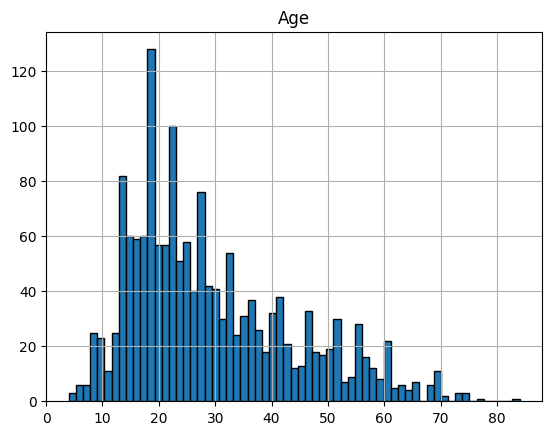

In [169]:
# 2.4 Clean the Age variable and make a histogram of the ages of the victims.

#cleaning age variable
sharks['Age'].describe()
#sharks.head(5)
#drop n/a value for the histogram in the age column by making a copy of the dataframe
#make a copy
sharks_copy = sharks.copy()

#sharks_copy = sharks_copy.dropna(subset= ['Age'])
#drop string values

#regex = False to replace exact patterns ... too many irregular entries
#sharks_copy['Age'] = sharks_copy['Age'].replace(['Teens', '28, 23 & 30', '46 & 34', '30 or 36', 'M', '6 1/2', '33 or 37', '21 & ?', '23 & 20', 'mid-30s', '!2', '20/30', '!!', '7 & 31'], np.nan , regex = False)
#sharks_copy['Age'].describe()

sharks_copy['Age'].value_counts()


#histogram of ages of victims
#ignore n/a values, convert non-numeric values to na
#determine bin count

n = len(sharks_copy['Age'].dropna())
bins = int(np.sqrt(n))

sharks_copy['Age'] = pd.to_numeric(sharks_copy['Age'], errors = 'coerce')

sharks_copy.dropna().hist(bins = bins, column = 'Age', edgecolor='black')



In [170]:
#2.5 What proportion of victims are male?

#male victims/total victims with gender reporting

#male victims
male = sharks[sharks['Sex']=='M']
m = len(male)
#female victims
female = sharks[sharks['Sex']=='F']
f = len(female)

f + m
#proportion
m / (f+ m)


0.8764448609809434

In [171]:
# 2.6 Clean the Type variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?

#clean Type variable - to take: Provoked, Unprovoked, Unknown, drop n/a, other
sharks.copy2 = sharks.copy()

#list other entries of type as unknown

#sharks.copy2['Type'].value_counts()

#sharks.copy2 =sharks.copy2[sharks.copy2['Type'].isin(['Unprovoked', 'Provoked', 'Unknown'])]

#replacing other entries as unknown
#.replace() expects values not conditions
#use .loc for conditions and strings in rows
#argument: row condition, column name, new value
sharks.copy2.loc[~sharks.copy2['Type'].isin(['Unprovoked', 'Provoked']), 'Type'] = 'Unknown'

#verify
sharks.copy2['Type'].value_counts()


#unprovoked attacks/total of cleaned type variable

#unprovoked

un = sharks.copy2[sharks.copy2['Type'] == 'Unprovoked']
num_unprovoked = len(un)

#total
total = len(sharks.copy2)


#proportion
num_unprovoked/ total

<ipython-input-171-d7842ab861b9>:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  sharks.copy2 = sharks.copy()


0.7368722277865217

In [172]:
#2.7 Clean the Fatal Y/N variable so it only takes three values: Y, N, and Unknown.

#clean Fatal variable, divide into three types of values

#sharks.columns

sharks.loc[~sharks['Fatal Y/N'].isin(['Y', 'N']), 'Fatal Y/N'] = 'Unknown'

#verify
sharks['Fatal Y/N'].value_counts()


,count
Fatal Y/N,
N,4869
Y,1468
Unknown,652


In [173]:
# 2.8 Are sharks more likely to launch unprovoked attacks on men or women?
#subset unprovoked, then look at men/women counts individually
#.shape[0] returns num of rows that match the condition
#use & operator for and statements
#use .loc for specific row conditions
#conditions need to be in separate parentheses

unprov_male = sharks.copy2.loc[(sharks.copy2['Type']=='Unprovoked') & (sharks.copy2['Sex'] == 'M')].shape[0]

unprov_female = sharks.copy2.loc[(sharks.copy2['Type']=='Unprovoked') & (sharks.copy2['Sex']=='F')].shape[0]

unprov_male #4217
unprov_female #656

unprov_female > unprov_male
#There are about 4217 cases of unrpovoked male shark attacks and 656 cases of unprovoked female shark attacks. Given the large disparity in the data, it seems that
#males are more likely to get attacked in these conditions.

#Is the attack more or less likely to be fatal when the attack is provoked or unprovoked?
prov_fatal = sharks.copy2.loc[(sharks.copy2['Type']=='Provoked') & (sharks.copy2['Fatal Y/N']=='Y')].shape[0] # 19

unprov_fatal = sharks.copy2.loc[(sharks.copy2['Type'] == 'Unprovoked') & (sharks.copy2['Fatal Y/N'] == 'Y')].shape[0] #1199

prov_fatal > unprov_fatal
# It is much more likely for the attack to be unprovoked and fatal than provoked and fatal.

# Is it more or less likely to be fatal when the victim is male or female?
fatal_f = sharks.copy2.loc[(sharks.copy2['Sex'] == 'F') & (sharks.copy2['Fatal Y/N']== 'Y')].shape[0] #117

fatal_m = sharks.copy2.loc[(sharks.copy2['Sex']== 'M') & (sharks.copy2['Fatal Y/N'] == 'Y')].shape[0] #1186

fatal_f > fatal_m

#There are many more cases of male fatalities than female fatalities from shark attacks according to this dataset.

#How do you feel about sharks?
# I don't like sharks. I never have. They are not cool. My family unknowingly went to the capital of shark bites beach this past summer. I saw it on the t-shirts there, so
#obviously I did not go in the water. My parents told me not to tell my siblings because they would freak out, so I just let them go. Everyone was fine, but I did not enjoy that trip.

False

In [191]:
# 2.9 What proportion of attacks appear to be by white sharks? (Hint: str.split() makes a vector of text values into a list of lists, split by spaces.)
#use 'Species ' column

#rename Species column to remove white space in name
sharks = sharks.rename(columns = {'Species ': 'Species'})

#keep as a name format as a list, split on space delimiter
#sharks['full name'] = sharks['full name'].str.split(' ')
#str.split()
#white includes all types of white sharks, including whitetailed, etc., otherwise I would put a space after 'white ' in the contains to be more specific
white = sharks[sharks['Species'].str.contains('white', na = False)]

#breed.tail(10)
#white sharks total
wh = len(white) #243

#total_attacks
tot = len(sharks) #6989
#proportion : white/total_attacks
wh/tot


0.034768922592645586

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

In [ ]:
#3.1 This paper is about a framework used to tidy up messy data sets for easy data manipulation.

# 3.2  The tidy data standard is made so the initial data cleaning/exploration is simplified and to organize data values within a dataset.


#3.3 The first statement means that clean datasets are alike in that the same tools can be used to manipulate the data and extract what you need, whereas with messy
#data, the different datasets require different tools and methods unique to the entries and columns of the data.

#The second statement, in the context of R/coding, means that observations are layed out as rows and variables are layed out as columns in a dataframe, which makes
#this distinction easy. But outside of this context, people struggle with marking the difference in the term definitions.

#3.4 Wickham defines values as belonging to a variable and observation, typically in the form of numbers or strings. He defines variables as containing all values
#measured on the same underlying attribute across units. He defines observation as containing all values measured on the same unit acorss attributes.

#3.5 Tidy Data is defined in section 2.3 as a standard way of mapping the meaning of a datset to its structure. It has the following three characteristics:
#each variables forms a column; each observation forms a row; each type of observational unit forms a table.

#3.6 The five most common problems with messy datasets are :
#The data in Table4 is messy because
#Melting data is

#3.7 Table 11 is messy b/c..
#Table 12 is tidy and molten bc

#3.8 The chicken and the egg problem focusslddfd
#Wickham hopes that in the future ...(data wrangling)


**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?